# Lab 5

Ali Tejani, amt3639

Caroline Yao, chy253

Allen Hwang, ah45755

## Problem 1: Linear Discriminant Analysis

### 1. Plot samples from similar gaussians

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
# randomly sample distributions 20 times each
cov1 = [[1,0.9,0.9],[0.9,1,0.9],[0.9,0.9,1]]
cov2 = [[1,0.8,0.8],[0.8,1,0.8],[0.8,0.8,1]]
p1 = np.random.multivariate_normal([0,0,0],cov1,20)
p2 = np.random.multivariate_normal([0,0,1],cov2,20)

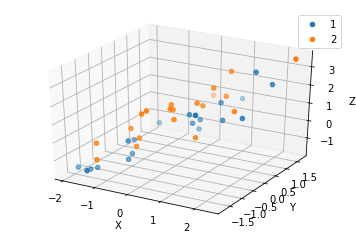

In [4]:
# plot on 3d graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p1[:,0],p1[:,1],p1[:,2],label='1')
ax.scatter(p2[:,0],p2[:,1],p2[:,2],label='2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

### 2. Project distributions onto 1D using LDA

We will simply use the formulas we learned in class, minimizing the variance within the groups of points and maximizing the variance between them.

w*max* = S*w*^-1 * (u1-u2)

In [5]:
# get means of distributions
mean1 = np.mean(p1,axis=0)
mean2 = np.mean(p2,axis=0)
print "mean of 1:"
print mean1
print "mean of 2:"
print mean2
mean_diff = mean2-mean1

mean of 1:
[-0.05730916 -0.01717358  0.02165525]
mean of 2:
[ 0.0691547   0.0575559   0.95773155]


In [6]:
# find the scatter matrices of the data points
scatter1 = np.dot((p1-mean1).T,p1)
scatter2 = np.dot((p2-mean2).T,p2)
print "cov of 1:"
print scatter1/p1.shape[0]
print "cov of 2:"
print scatter2/p2.shape[0]
scatterW = scatter1 + scatter2

cov of 1:
[[ 1.22538662  1.02829377  1.21904916]
 [ 1.02829377  0.98651959  1.11356234]
 [ 1.21904916  1.11356234  1.44544193]]
cov of 2:
[[ 0.82404425  0.64369346  0.71808561]
 [ 0.64369346  0.73068747  0.72991775]
 [ 0.71808561  0.72991775  1.04715527]]


In [7]:
# plug into equation
wmax = np.dot(np.linalg.inv(scatterW),mean_diff)

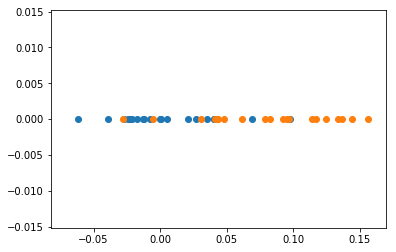

In [8]:
newPoints1 = np.dot(p1,wmax)
plt.scatter(newPoints1,[0]*len(newPoints1))
newPoints2 = np.dot(p2,wmax)
plt.scatter(newPoints2,[0]*len(newPoints2))

### 3. Using sklearn

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# combine points and create label array
combinedPoints = np.concatenate((p1,p2))
labels = np.array([1]*len(p1) + [2]*len(p2))

In [10]:
# perform transformation
clf = LinearDiscriminantAnalysis(n_components=2)
newPoints = clf.fit_transform(combinedPoints,labels)

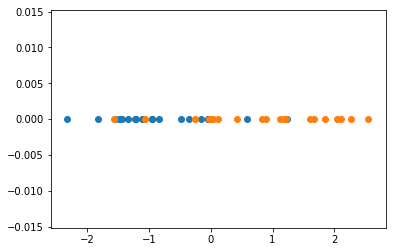

In [11]:
# plot separate distributions separately
plt.scatter(newPoints[:20],[0]*len(newPoints[:20]))
plt.scatter(newPoints[20:],[0]*len(newPoints[20:]))

The plots are almost identical. However they seem to be scaled differently. 

## Problem 2. Chapter 4, Problem 10 

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix

In [13]:
weekly = pd.read_csv("weekly.csv", index_col = 0)
weekly.head()

IOError: File weekly.csv does not exist

In [ ]:
weekly.shape

In [ ]:
import seaborn as sns
sns.pairplot(weekly)
plt.show()

There appears to be some patterns along the diagonal of the data set, and it seems that the first row is the transpose of the first column.  Let's take a closer look at Volume vs Today.

In [ ]:
from sklearn import datasets, linear_model
Vol = weekly.as_matrix(["Volume"])
Today = weekly.as_matrix(["Today"])
lr = linear_model.LinearRegression()
lr.fit(Vol,Today)
plt.scatter(Vol, Today,  color='red')
plt.plot(Vol, lr.predict(Vol), color='green',
         linewidth=3)
plt.show()

The data doesn't seem to have any obvious pattern or relations.  Let's look at the differecne between up days and down days with volume.

In [ ]:
def f(row):
    if row['Direction'] == 'Up':
        return 1
    return 0
weekly["Direction2"] = weekly.apply(f, axis = 1)
X = weekly.as_matrix(["Volume","Direction2"])
Y = weekly.as_matrix(["Today"])
lr = linear_model.LinearRegression()
lr.fit(X,Y)
print (lr.coef_, lr.intercept_)

In [ ]:

weekly_up = weekly[weekly.Direction2==1]
weekly_down = weekly[weekly.Direction2==0]
X_up = weekly_up.as_matrix(["Volume"])
Y_up = weekly_up.as_matrix(["Today"])
X_down = weekly_down.as_matrix(["Volume"])
Y_down = weekly_down.as_matrix(["Today"])
lr.fit(X_up, Y_up)
plt.scatter(X_up, Y_up,  color='red')
plt.plot(X_up, lr.predict(X_up), color='red',
         linewidth=2)
lr.fit(X_down, Y_down)
plt.scatter(X_down, Y_down,  color='green')
plt.plot(X_down, lr.predict(X_down), color='green',
         linewidth=2)
sns.despine()
plt.show()

From this data, it can be inferred that a log of movement in the stock(either up or down) drives a higher volume.  This makes sense; if the stocks makes huge jumps up, people will sell to collect profits, and also buy in hopes that the stock keeps moving up.  On the other hand, people will sell to mimize losses or buy out the share because the share is cheaper if the stock make huge jumps down.

### Logistic Regression on all data

In [ ]:
logiReg = LogisticRegression()
test1 = weekly.loc[:, "Lag1":"Volume"]
test1.head()

In [ ]:
logiReg.fit(test1, weekly["Direction"])

In [ ]:
test1.describe()

The matrix shows the result of describe() on the matrix made up of the predictor variables. All 5 Lag variables are very similar to each other. The Volume variable, by its nature, has a different structure, but just based on the above matrix, it is hard to say whether any of these variables are by themselves statistically significant.

### Confusion Matrix

In [ ]:
results = logiReg.predict(test1)
print(results.shape)
results

In [ ]:
print(confusion_matrix(weekly["Direction"], results))

Let's see which row corresponds to "Up" and which row corresponds to "Down"

In [ ]:
up_correct = 0
up_errors = 0
for num in range(1089):
    if (weekly["Direction"][num]=="Up" and results[num]=="Up"):
        up_correct+=1
    if (weekly["Direction"][num]=="Up" and results[num]=="Down"):
        up_errors +=1
print(up_correct)
print(up_errors)


Interpretation of the confusion matrix - 55 Downs and 558 Ups are predicted correctly. 47 Ups are predicted as downs and 429 Downs are predicted as ups.
Overall fraction of correct predictions - (55+558)/ (47+429+55+558) = 0.563

### Logistic Regression tested on 1990-2008 data

In [ ]:
pre_2009=weekly.loc[:984, :]
pre_2009.tail()

In [ ]:
post_2009 = weekly.loc[985:, :]
post_2009.head()

In [ ]:
lag2_training  = pre_2009["Lag2"]
lag2_training.shape

In [ ]:
lag2_training = np.reshape(lag2_training, (985, 1)) # Deprecation removal
new_logistic_regr = LogisticRegression()
new_logistic_regr.fit(lag2_training, pre_2009["Direction"])

In [ ]:
lag2_testing = post_2009["Lag2"]
lag2_testing.shape

In [ ]:
lag2_testing = np.reshape(lag2_testing, (104, 1))
new_results = new_logistic_regr.predict(lag2_testing)
print(confusion_matrix(post_2009["Direction"], new_results))

Assuming the same interpretation of the confusiono matrix as before, the matrix is as follows: - 9 Downs and 56 Ups are predicted correctly.  5 Ups were predicted as Downs and 34 Downs were predicted as Ups.  Overall fraction of correct predictions = (9+34)/(9 + 34 + 5 + 56) = 0.413

### Linear Discriminat Analysis

In [ ]:
lag2_training.shape

In [ ]:
lda=LDA()
lda.fit(lag2_training,pre_2009["Direction"])

In [ ]:
ldaresults=lda.predict(lag2_testing)

In [ ]:
print(confusion_matrix(post_2009["Direction"], ldaresults))

This is the exact same confusion matrix as the last logistc regression model.  Let's see if they have the same predictions.

In [ ]:
x1 = new_logistic_regr.predict_log_proba(lag2_training)
x2 = lda.predict_log_proba(lag2_training)
for num in range(5): # getting a small sampel
    print(x1[num], x2[num])

As the log probabilities returned by both these models are not the same, the fact that both these models return the same confusion matrix is not an issue.

Using the same interpretation as before, we can assume that it has the same ratio for correct predictions: 0.413

## QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()
qda.fit(lag2_training, pre_2009["Direction"])

In [ ]:
qda_results = qda.predict(lag2_testing)
print(confusion_matrix(post_2009["Direction"], qda_results))

The model appears to be predicting everything as up, and it doesn't seem as this was the intended effect.

Overall correct ratio: 61/104 = 0.59

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN()
knn.fit(lag2_training, pre_2009["Direction"])

In [ ]:
knn_results = knn.predict(lag2_testing)
print(confusion_matrix(post_2009["Direction"], knn_results))

16 Downs and 39 Ups are predicted correctly.  22 Ups and 27 Downs are predicted incorrectly.

Overall accuracy: (16 + 39) / (16+39+22+27) = 0.53

QDA seems to provide the best accuracy at 0.59

### KNN with varying N

In [ ]:
for i in range(1,7):
    knn = KNN(i)
    knn.fit(lag2_training, pre_2009["Direction"])
    knn_results = knn.predict(lag2_testing)
    print(confusion_matrix(post_2009["Direction"], knn_results))

It seems that KNN with n=4 has the best results

# Problem 3: Chapter 5, Problem 5

In [ ]:
default = pd.read_csv("default.csv",index_col=0)
default.head()

### a. Logistic regression on default using income and balance

In [ ]:
trainX = default[['balance','income']]
logitReg = LogisticRegression()
logitReg.fit(trainX,default['default'])
print(confusion_matrix(default["default"], logitReg.predict(trainX)))

There are 9664 true negatives, 0 true positives, 333 false negatives, and 3 false positives

### b-c. Validation set

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def validation_set_CV(default,test_size):
    default_train,default_test = train_test_split(default,test_size=test_size)
    xTrain = default_train[['balance','income']]
    yTrain = default_train['default']
    logitReg = LogisticRegression()
    logitReg.fit(xTrain,yTrain)
    return 1 - accuracy_score(default_test["default"], logitReg.predict(default_test[['balance','income']]))
def plot_validation_error():
    val_set_error = []
    for i in np.arange(.1,1,.1):
        val_set_error.append(validation_set_CV(default,i))
    plt.xlabel('Fraction of training set used as validation set')
    plt.scatter(np.arange(.1,1,.1),val_set_error)
    plt.show()
    print(np.around(val_set_error,decimals=4))

In [ ]:
plot_validation_error()

The validation set method seems to show best results when the validation set is small. However, this depends on the elements in the validation set, as running the cross-validation on different sets seems to change the results.

### d. Adding a student variable

In [ ]:
default = default.join(pd.get_dummies(default['student']))
default.head()

In [ ]:
def validation_set_CV(default,test_size):
    default_train,default_test = train_test_split(default,test_size=test_size)
    xTrain = default_train[['balance','income','No','Yes']]
    yTrain = default_train['default']
    logitReg = LogisticRegression()
    logitReg.fit(xTrain,yTrain)
    return 1 - accuracy_score(default_test["default"], logitReg.predict(default_test[['balance','income','No','Yes']]))

In [ ]:
plot_validation_error()

Adding a dummy variable for student did not do much for the errors.

# Problem 4: Chapter 5, Problem 8

### a. Generate simulated data set

In [91]:
np.random.seed(1)
x = np.random.randn(100)
y = np.random.randn(100)
y = x - (2*x**2) + np.random.randn(100)

n = 100, p = 2

The model used is:

y = x - 2x^2 + ϵ

### b. Create scatterplot

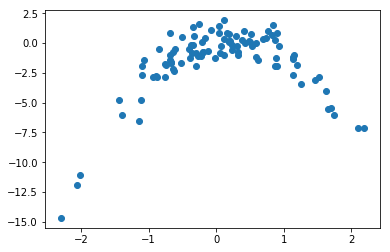

In [19]:
plt.scatter(x,y)

It looks quadratic. x values range from about -2 to 2 while y values range from -15 to 2.5.

### c. Compute LOOCV errors

In [106]:
import warnings
warnings.filterwarnings('ignore')
import sklearn.linear_model as skl_lm
import sklearn.model_selection as skl_ms
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(20)
data = pd.DataFrame(np.column_stack((x,y)), columns = ['x','y'])

p_order = np.arange(1,5) # array of degrees

for deg in p_order:
    loo = skl_ms.LeaveOneOut()
    regr = skl_lm.LinearRegression()
    poly = PolynomialFeatures(deg)
    x_poly = poly.fit_transform(df.x.reshape(-1,1))
    score = skl_ms.cross_val_score(regr, x_poly, y, cv=loo, scoring='neg_mean_squared_error').mean()
    print('Polynomial Model {}:'.format(deg))
    print('    Leave One Out Mean Square Error: {}\n'.format(score*-1))

Polynomial Model 1:
    Leave One Out Mean Square Error: 9.69308853773

Polynomial Model 2:
    Leave One Out Mean Square Error: 0.882449703088

Polynomial Model 3:
    Leave One Out Mean Square Error: 0.902082122872

Polynomial Model 4:
    Leave One Out Mean Square Error: 0.92560396807



### d. Repeat with different seed

In [107]:
np.random.seed(200)

for deg in p_order:
    loo = skl_ms.LeaveOneOut()
    regr = skl_lm.LinearRegression()
    poly = PolynomialFeatures(deg)
    x_poly = poly.fit_transform(df.x.reshape(-1,1))
    score = skl_ms.cross_val_score(regr, x_poly, y, cv=loo, scoring='neg_mean_squared_error').mean()
    print('Polynomial Model {}:'.format(deg))
    print('    Leave One Out Mean Square Error: {}\n'.format(score*-1))

Polynomial Model 1:
    Leave One Out Mean Square Error: 9.69308853773

Polynomial Model 2:
    Leave One Out Mean Square Error: 0.882449703088

Polynomial Model 3:
    Leave One Out Mean Square Error: 0.902082122872

Polynomial Model 4:
    Leave One Out Mean Square Error: 0.92560396807



The results for both seeds are the same since LOOCV uses n folds to predict a single point.

### e. Smallest LOOCV error

The quadratic model had the smallest LOOCV error. This is what I expected since the plot in b resembled a quadratic.  